In [31]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import seaborn as sns

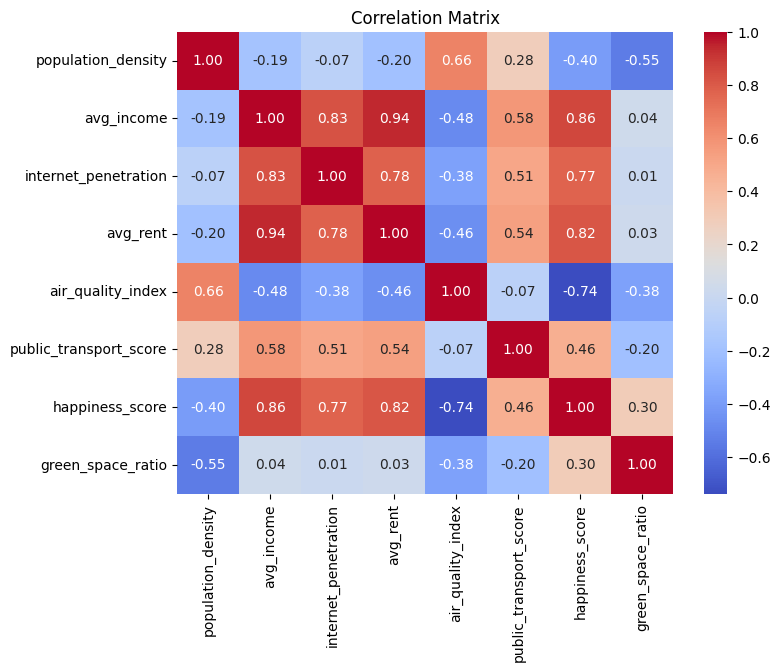

In [9]:
# import dataset and analyze correlations
df = pd.read_csv("city_lifestyle_dataset.csv", index_col=0)
df = df.drop("country", axis=1)
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Keep internet_penetration and green_space_ration
df = df.drop(["population_density", "avg_income", "avg_rent", "air_quality_index", "public_transport_score", "happiness_score"], axis=1)

KeyError: "['population_density', 'avg_income', 'avg_rent', 'air_quality_index', 'public_transport_score', 'happiness_score'] not found in axis"

In [18]:
# Analyze dataset
df.describe()

,internet_penetration,green_space_ratio
count,300.000000,300.000000
mean,74.305333,33.993333
std,17.014492,9.434067
min,34.000000,2.000000
25%,64.400000,28.225000
50%,75.000000,34.700000
75%,87.225000,40.400000
max,100.000000,58.000000


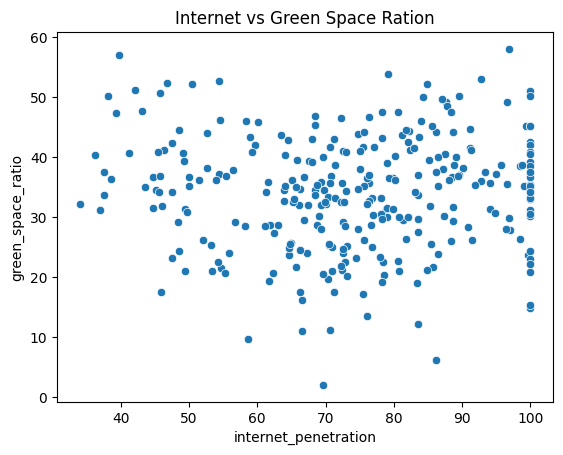

In [22]:
sns.scatterplot(x="internet_penetration", y="green_space_ratio", data=df)
plt.title("Internet vs Green Space Ration")
plt.show()

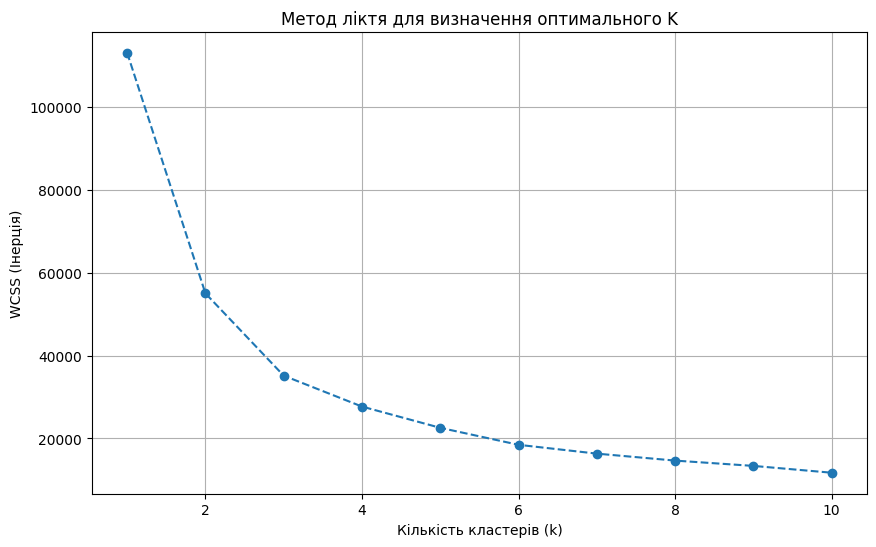

In [26]:
# Elbow method for K-means
wcss = [] 
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Метод ліктя для визначення оптимального K')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('WCSS (Інерція)')
plt.grid(True)
plt.show()

In [28]:
# K-means 
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10,        
                random_state=42)

labels = kmeans.fit_predict(df)

centers = kmeans.cluster_centers_
print(centers)

[[48.96612903 36.73064516]
 [92.43823529 37.71470588]
 [72.25735294 29.95441176]]


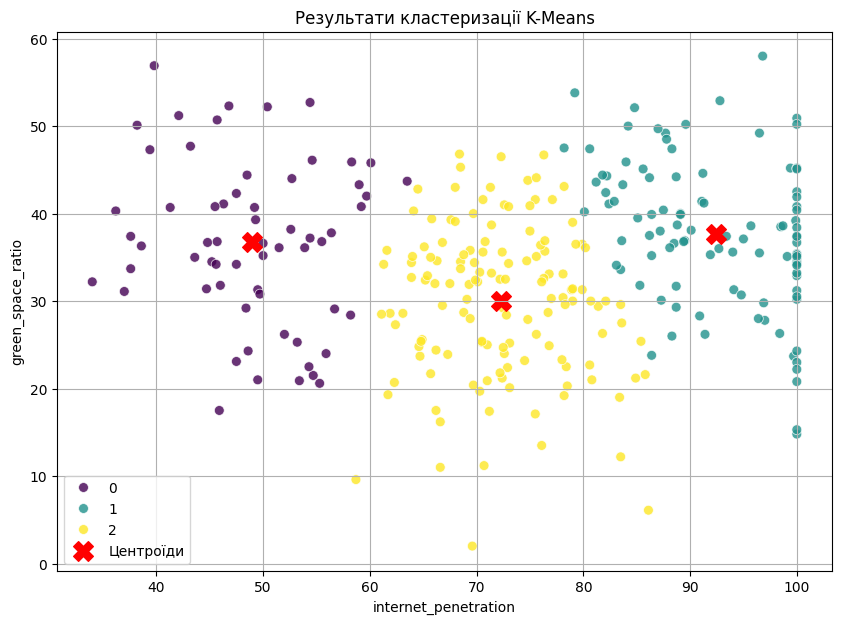

In [29]:
# Visualisation 
df['cluster'] = labels
col_x = df.columns[0]
col_y = df.columns[1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x=col_x, y=col_y, hue='cluster', palette='viridis', s=50, alpha=0.8)

plt.scatter(centers[:, 0], centers[:, 1], 
            c='red',        
            s=200,          
            marker='X',     
            label='Центроїди') 

plt.title('Результати кластеризації K-Means')
plt.xlabel(col_x) 
plt.ylabel(col_y) 
plt.legend()    
plt.grid(True)
plt.show()

In [30]:
# The closest and farthest neighbour 
agg_single = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = agg_single.fit_predict(df)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = agg_complete.fit_predict(df)

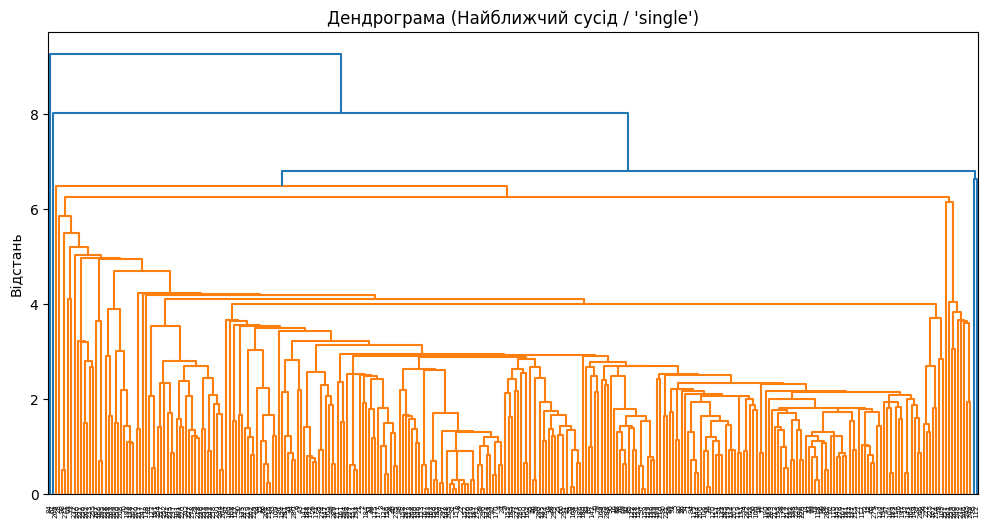

In [34]:
Z_single = linkage(df, method='single')
plt.figure(figsize=(12, 6))
plt.title("Дендрограма (Найближчий сусід / 'single')")
plt.ylabel("Відстань")
plt.xticks(rotation=90)
dendrogram(Z_single)
plt.show()

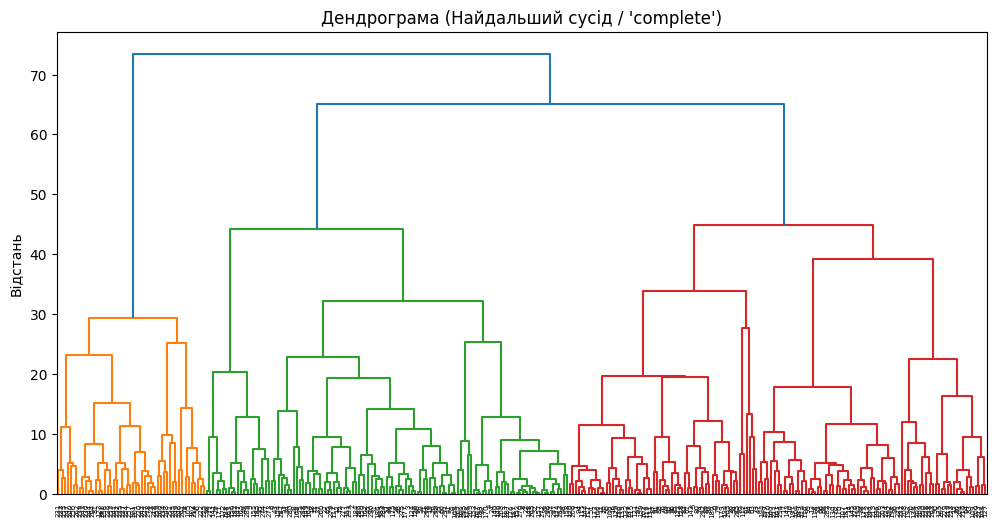

In [35]:
Z_complete = linkage(df, method='complete')
plt.figure(figsize=(12, 6))
plt.title("Дендрограма (Найдальший сусід / 'complete')")
plt.ylabel("Відстань")
plt.xticks(rotation=90)
dendrogram(Z_complete)
plt.show()